## 02a_temporalOutlinksHeatmap
Take in the outlink temporal inclusion dataframes and create clustered heatmaps based on temporal inclusion

import:

    00_outlinkInclusiondf_en.pkl
    00_outlinkInclusiondf_ar.pkl
    
output:
    pngs of the heatmaps in '02_Visuals'
    ar_100_199_outlinkHeatmap.png
    ar_100_199_spatialOutlinkHeatmap.png
    ar_spatialOutlinkHeatmap_Cluster.png
    ar_tot_spatialOutlinkHeatmap.png
    en_100_199_outlinkHeatmap.png
    en_100_199_spatialOutlinkHeatmap.png
    en_spatialOutlinkHeatmap_Cluster.png
    en_tot_spatialOutlinkHeatmap.png
    

The Plan:
- get temporal inclusion dataframes
- plot a heatmap of a subsection of the data
- find the pairwise distances of their temporal inclusion
- plot a subection of these pairwise distances
- plot all of the pairwise distances
- cluster the outlinks by their pairwise distancs

    
Plan
1. English
2. Arabic

In [10]:
#import necessary items

import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

#for heatmap
import seaborn as sns

#for pairwise distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

## 1. English

In [33]:
#import the data

#get data
with open('../Data/00_outlinkInclusiondf_en.pkl', 'rb') as f:
    en_data = pickle.load(f)

In [34]:
#visual
en_data

timestamp                            2011-01-31  2011-02-28  2011-03-31  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           1   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           1   
Zine El Abidine Ben Ali                       0           1           1   
Zouérat                                       0           0           0   

timestamp                            2011-04-30  2011-05-31  2011-06-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           0   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           0   
Zine El Abidine Ben Ali                       1           1           1   
Zouérat                                       1           1           1   

timestamp                            2011-07-31  2011-08-31  2011-09-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           0   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           0   
Zine El Abidine Ben Ali                       1           1           1   
Zouérat                                       1           1           1   

timestamp                            2011-10-31  ...  2023-07-31  2023-08-31  \
15 October 2011 global protests               0  ...           0           0   
17 October Revolution                         0  ...           1           1   
2000s energy crisis                           0  ...           0           0   
2004–05 Palestinian local elections           0  ...           0           0   
2005 Ahvaz unrest                             0  ...           0           0   
...                                         ...  ...         ...         ...   
Zaydism                                       0  ...           1           1   
Zeynep Tufekci                                0  ...           1           1   
Zimbabwe                                      0  ...           0           0   
Zine El Abidine Ben Ali                       1  ...           1           1   
Zouérat                                       1  ...           0           0   

timestamp                            2023-09-30  2023-10-31  2023-11-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         1           1           1   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections 

### 1a. Create Subsection Heatmap

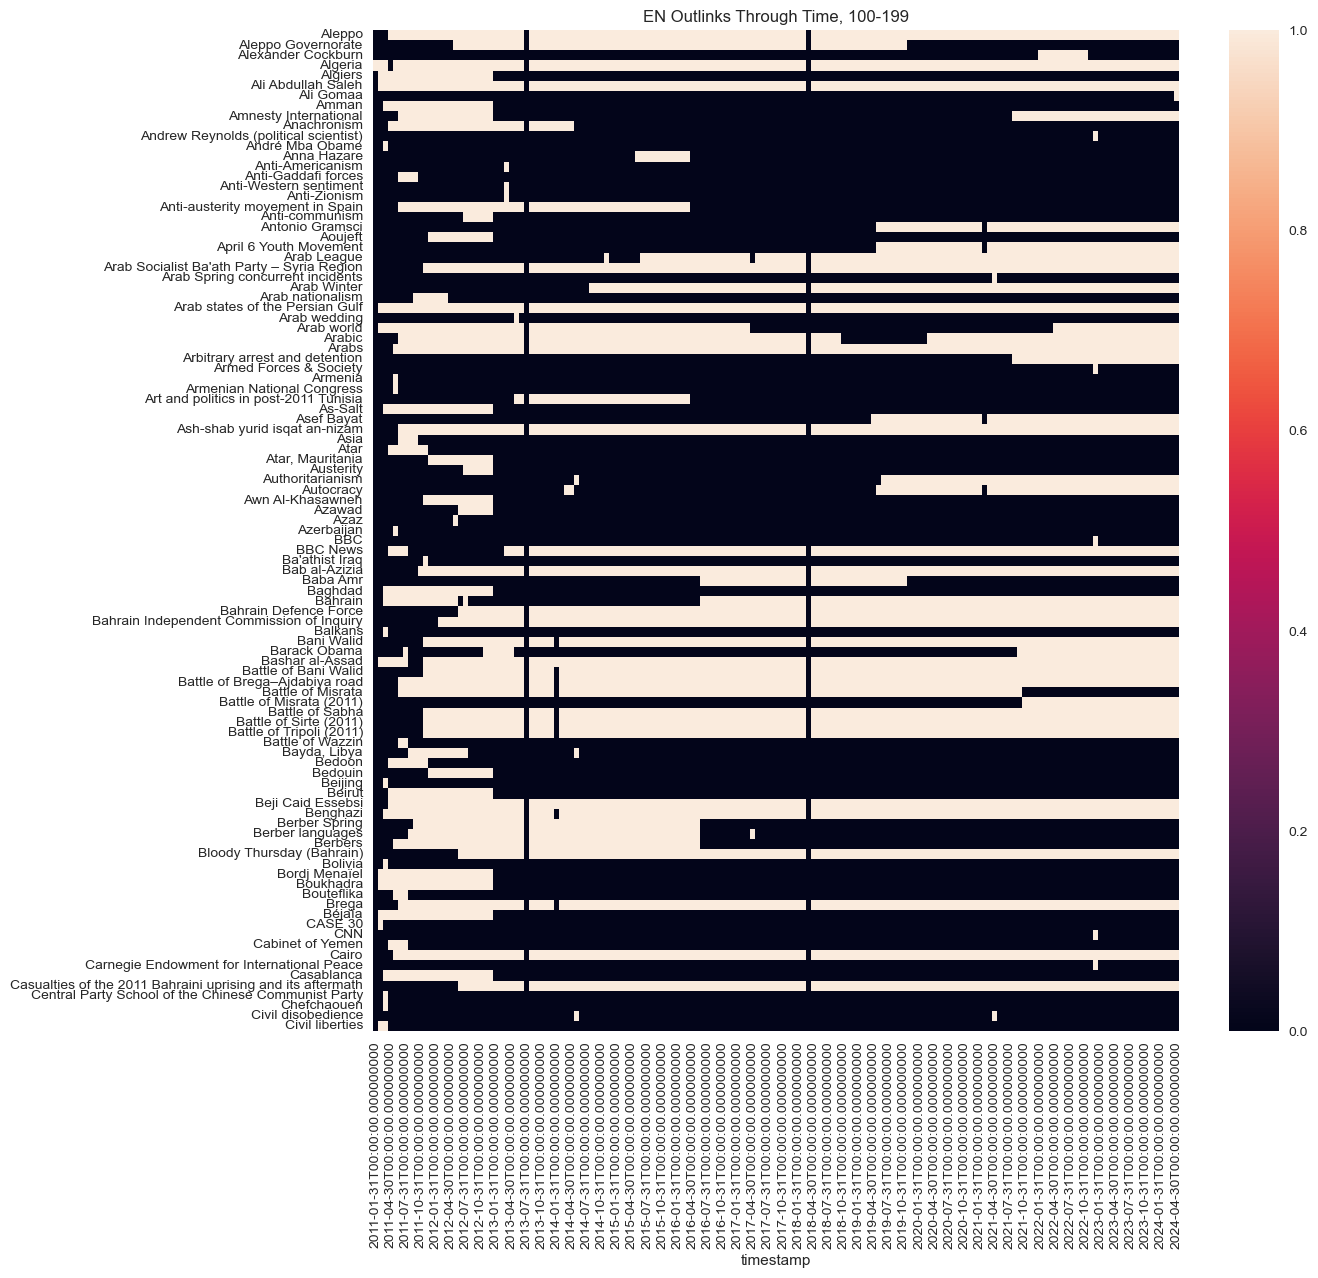

In [35]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.style.use("seaborn")

plt.figure(figsize = (13,13))
heat_map = sns.heatmap(en_data.iloc[100:199], yticklabels = True) #first 100 columns
plt.title("EN Outlinks Through Time, 100-199")
plt.savefig('02_Visuals/en_100_199_outlinkHeatmap.png')

plt.show()

### 1b. Identify Pairwise Distances

In [36]:
#https://drawingfromdata.com/pandas/clustering/making-a-pairwise-distance-matrix-in-pandas.html

squareform(pdist(en_data.loc[:]))
pairDf_en = 1 - pd.DataFrame( squareform(pdist(en_data.loc[:], metric='cosine')),
    columns = en_data.index,
    index = en_data.index
)

In [37]:
pairDf_en.head()

15 October 2011 global protests  \
15 October 2011 global protests                               1.0000   
17 October Revolution                                         0.0000   
2000s energy crisis                                           0.0000   
2004–05 Palestinian local elections                           0.0000   
2005 Ahvaz unrest                                             0.3669   

                                     17 October Revolution  \
15 October 2011 global protests                        0.0   
17 October Revolution                                  1.0   
2000s energy crisis                                    0.0   
2004–05 Palestinian local elections                    0.0   
2005 Ahvaz unrest                                      0.0   

                                     2000s energy crisis  \
15 October 2011 global protests                      0.0   
17 October Revolution                                0.0   
2000s energy crisis                                  1.0   
2004–05 Palestinian local elections                  0.0   
2005 Ahvaz unrest                                    0.0   

                                     2004–05 Palestinian local elections  \
15 October 2011 global protests                                      0.0   
17 October Revolution                                                0.0   
2000s energy crisis                                                  0.0   
2004–05 Palestinian local elections                                  1.0   
2005 Ahvaz unrest                                                    0.0   

                                     2005 Ahvaz unrest  \
15 October 2011 global protests                 0.3669   
17 October Revolution                           0.0000   
2000s energy crisis                             0.0000   
2004–05 Palestinian local elections             0.0000   
2005 Ahvaz unrest                               1.0000   

                                     2005 Palestinian presidential election  \
15 October 2011 global protests                                         0.0   
17 October Revolution                                                   0.0   
2000s energy crisis                                                     0.0   
2004–05 Palestinian local elections                                     1.0   
2005 Ahvaz unrest                                                       0.0   

                                     2006 Palestinian legislative election  \
15 October 2011 global protests                                        0.0   
17 October Revolution                                                  0.0   
2000s energy crisis                                                    0.0   
2004–05 Palestinian local elections                                    1.0   
2005 Ahvaz unrest                                                      0.0   

                                     2007–2008 world food price crisis  \
15 October 2011 global protests                               0.661143   
17 October Revolution                                         0.000000   
2000s energy crisis                                           0.000000   
2004–05 Palestinian local elections                           0.164399   
2005 Ahvaz unrest                                             0.434959   

                                     2008 Armenian presidential election  \
15 October 2011 global protests                                      0.0   
17 October Revolution                                                0.0   
2000s energy crisis                                                  0.0   
2004–05 Palestinian local elections                                  0.0   
2005 Ahvaz unrest                                                    0.0   

                                     2009 Iranian presidential election protests  \
15 October 2011 global protests                                         0.930949   
17 October Revolution                             

In [39]:
#save data
with open('../Data/02b_cosineLinks_en.pkl', 'wb') as f:
    pickle.dump(pairDf_en, f)

<function matplotlib.pyplot.show(close=None, block=None)>

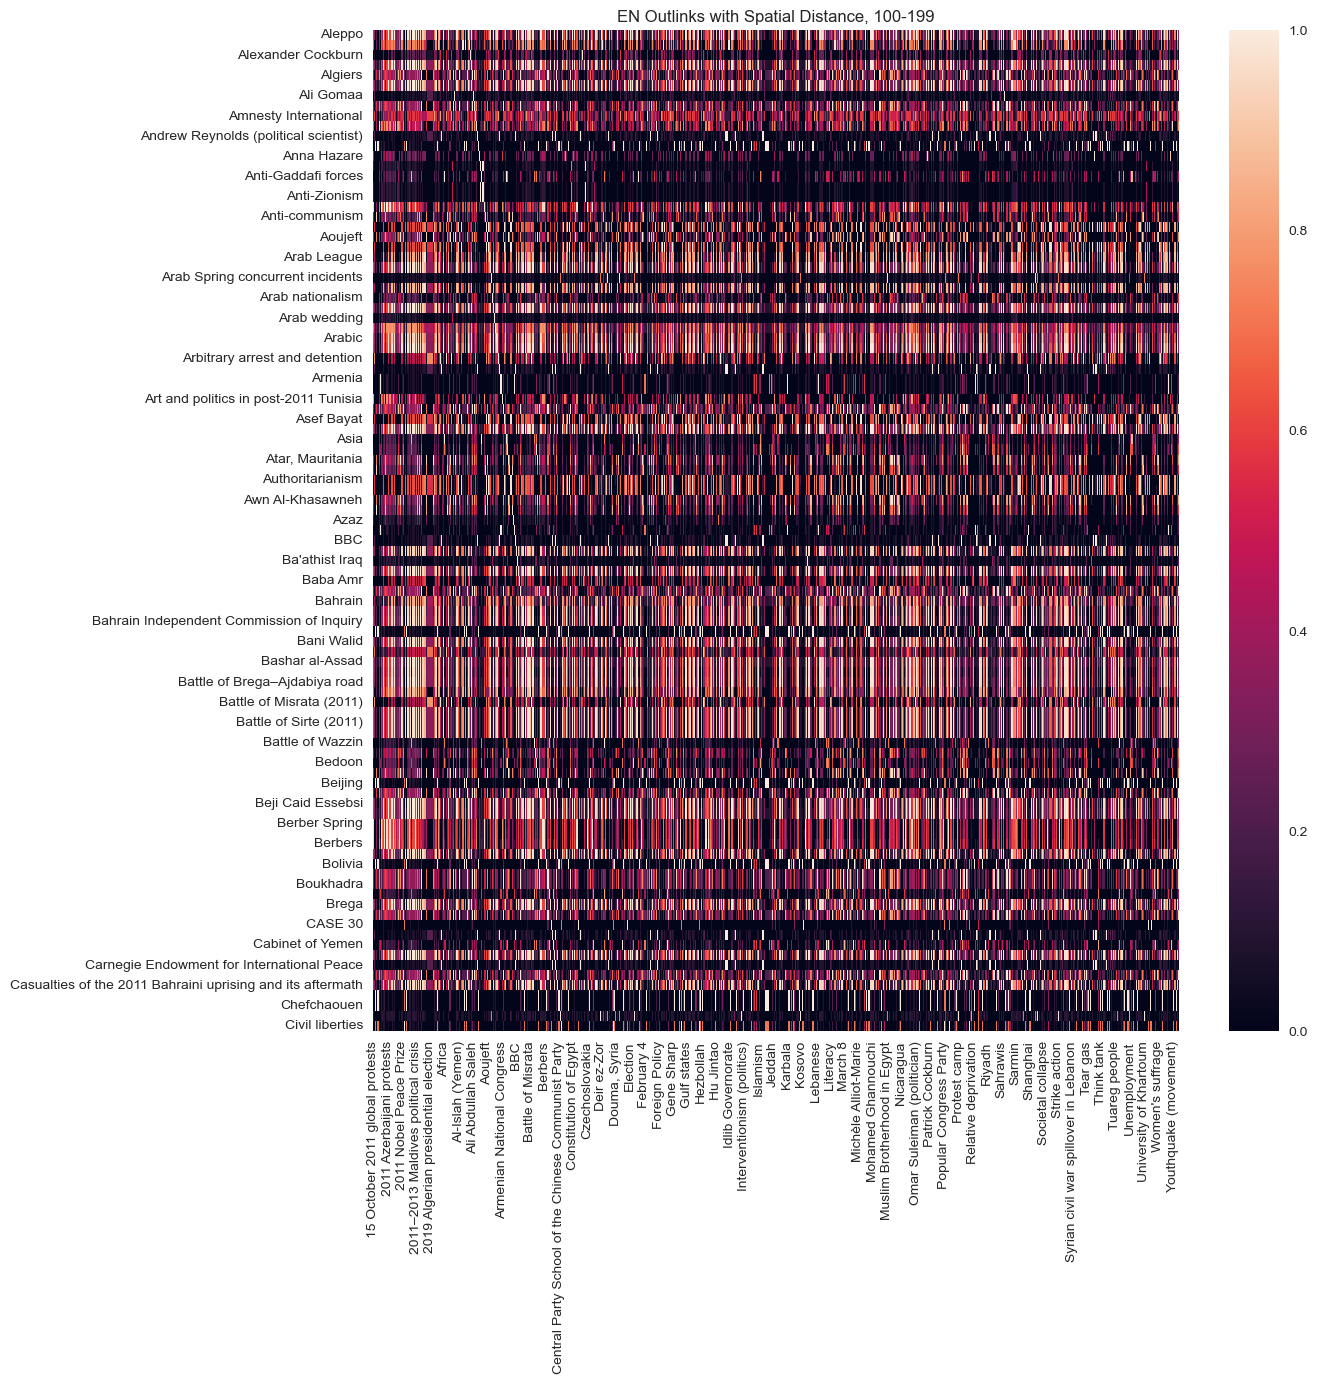

In [40]:
#plot the pairwise distances of all of the outlinks for a subsection

plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_en[100:199])

plt.title('EN Outlinks with Spatial Distance, 100-199')
plt.savefig('02_Visuals/en_100_199_spatialOutlinkHeatmap.png')

plt.show

In [41]:
#plot the pairwise distances of all of the outlinks
plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_en)

plt.title('EN Outlinks with Spatial Distance, total')
plt.savefig('02_Visuals/en_tot_spatialOutlinkHeatmap.png')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### 1c. Cluster The Outlinks by Pairwise Similarity 

In [42]:
#https://seaborn.pydata.org/generated/seaborn.clustermap.html

clusterPlt = sns.clustermap(pairDf_en)
clusterPlt.fig.suptitle("EN Outlinks with Spatial Distance, Cluster")
plt.savefig('02_Visuals/en_spatialOutlinkHeatmap_Cluster.png')
clusterPlt


## 2. Arabic

In [52]:
#get data
with open('../Data/00_outlinkInclusiondf_ar.pkl', 'rb') as f:
    ar_data = pickle.load(f)

In [53]:
ar_data

timestamp                            2011-01-31  2011-02-28  2011-03-31  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           1   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           1   
Zine El Abidine Ben Ali                       0           1           1   
Zouérat                                       0           0           0   

timestamp                            2011-04-30  2011-05-31  2011-06-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           0   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           0   
Zine El Abidine Ben Ali                       1           1           1   
Zouérat                                       1           1           1   

timestamp                            2011-07-31  2011-08-31  2011-09-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         0           0           0   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections           0           0           0   
2005 Ahvaz unrest                             0           0           0   
...                                         ...         ...         ...   
Zaydism                                       0           0           0   
Zeynep Tufekci                                0           0           0   
Zimbabwe                                      0           0           0   
Zine El Abidine Ben Ali                       1           1           1   
Zouérat                                       1           1           1   

timestamp                            2011-10-31  ...  2023-07-31  2023-08-31  \
15 October 2011 global protests               0  ...           0           0   
17 October Revolution                         0  ...           1           1   
2000s energy crisis                           0  ...           0           0   
2004–05 Palestinian local elections           0  ...           0           0   
2005 Ahvaz unrest                             0  ...           0           0   
...                                         ...  ...         ...         ...   
Zaydism                                       0  ...           1           1   
Zeynep Tufekci                                0  ...           1           1   
Zimbabwe                                      0  ...           0           0   
Zine El Abidine Ben Ali                       1  ...           1           1   
Zouérat                                       1  ...           0           0   

timestamp                            2023-09-30  2023-10-31  2023-11-30  \
15 October 2011 global protests               0           0           0   
17 October Revolution                         1           1           1   
2000s energy crisis                           0           0           0   
2004–05 Palestinian local elections 

### 2a. Create Subsection Heatmap

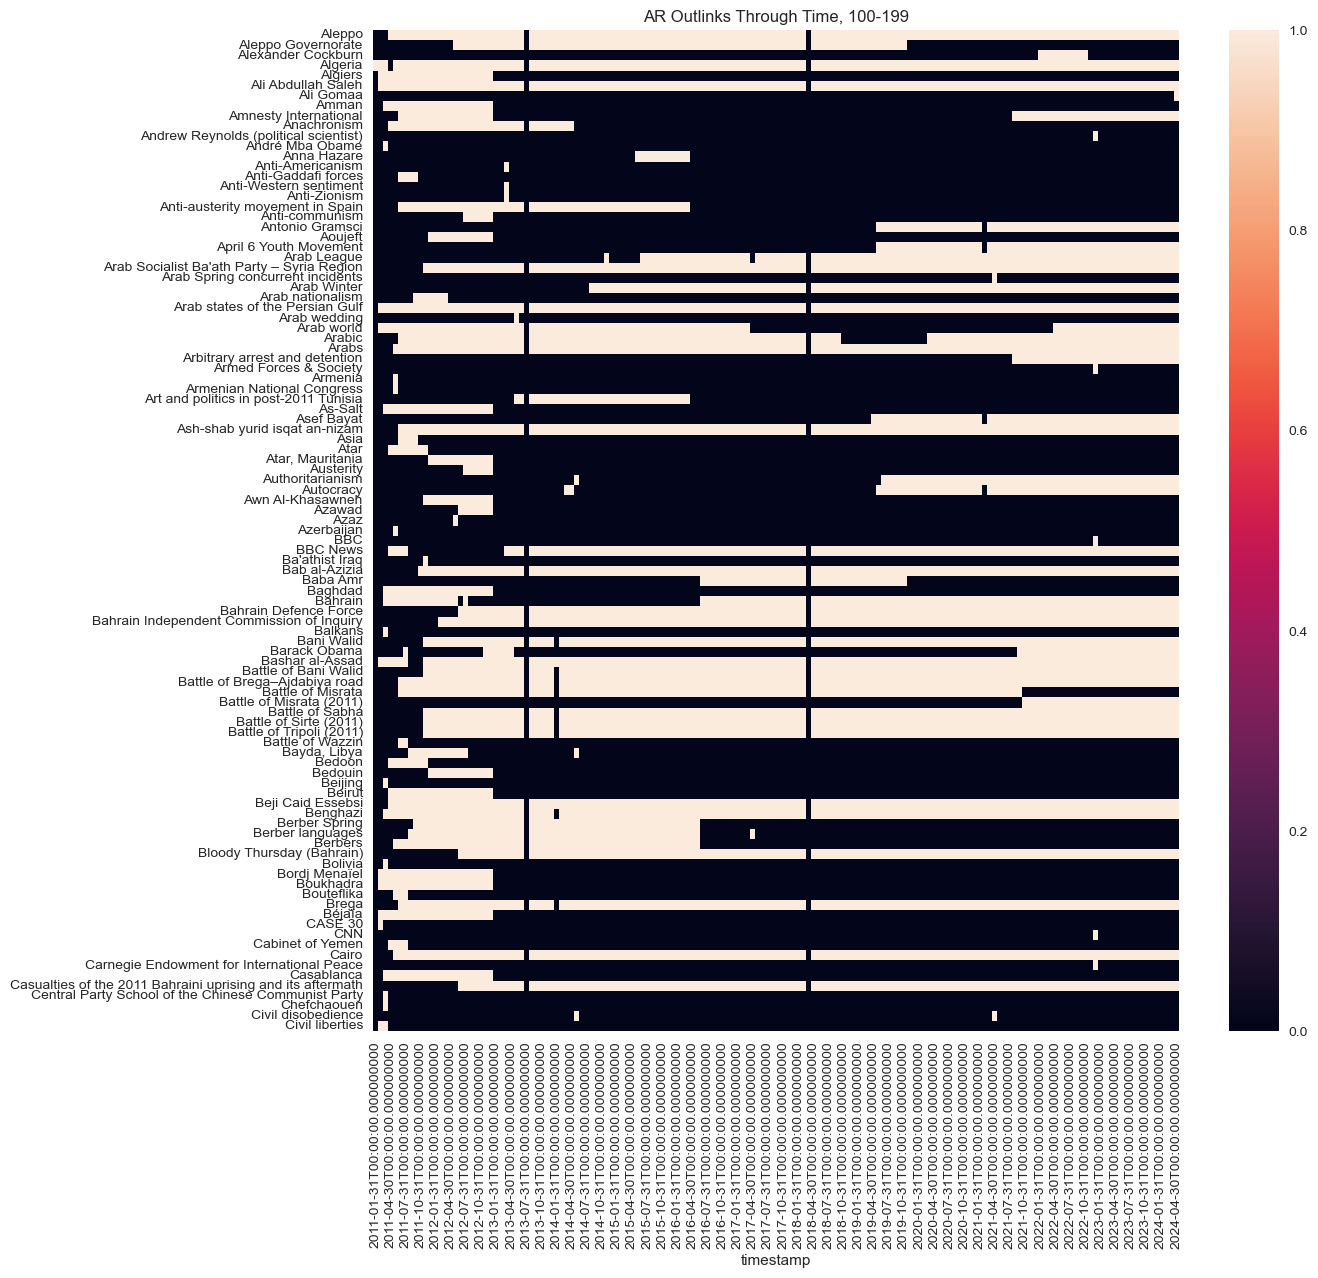

In [45]:
plt.style.use("seaborn")

plt.figure(figsize = (13,13))
heat_map = sns.heatmap(ar_data.iloc[100:199], yticklabels = True)


plt.title("AR Outlinks Through Time, 100-199")
plt.savefig("02_Visuals/ar_100_199_outlinkHeatmap.png")
plt.show()

### 2b. Identify Pairwise Distances

In [46]:
#https://drawingfromdata.com/pandas/clustering/making-a-pairwise-distance-matrix-in-pandas.html

pairDf_ar = 1 - pd.DataFrame( squareform(pdist(ar_data.loc[:], metric='cosine')),
    columns = ar_data.index,
    index = ar_data.index
)

In [47]:
pairDf_ar.head()

15 October 2011 global protests  \
15 October 2011 global protests                               1.0000   
17 October Revolution                                         0.0000   
2000s energy crisis                                           0.0000   
2004–05 Palestinian local elections                           0.0000   
2005 Ahvaz unrest                                             0.3669   

                                     17 October Revolution  \
15 October 2011 global protests                        0.0   
17 October Revolution                                  1.0   
2000s energy crisis                                    0.0   
2004–05 Palestinian local elections                    0.0   
2005 Ahvaz unrest                                      0.0   

                                     2000s energy crisis  \
15 October 2011 global protests                      0.0   
17 October Revolution                                0.0   
2000s energy crisis                                  1.0   
2004–05 Palestinian local elections                  0.0   
2005 Ahvaz unrest                                    0.0   

                                     2004–05 Palestinian local elections  \
15 October 2011 global protests                                      0.0   
17 October Revolution                                                0.0   
2000s energy crisis                                                  0.0   
2004–05 Palestinian local elections                                  1.0   
2005 Ahvaz unrest                                                    0.0   

                                     2005 Ahvaz unrest  \
15 October 2011 global protests                 0.3669   
17 October Revolution                           0.0000   
2000s energy crisis                             0.0000   
2004–05 Palestinian local elections             0.0000   
2005 Ahvaz unrest                               1.0000   

                                     2005 Palestinian presidential election  \
15 October 2011 global protests                                         0.0   
17 October Revolution                                                   0.0   
2000s energy crisis                                                     0.0   
2004–05 Palestinian local elections                                     1.0   
2005 Ahvaz unrest                                                       0.0   

                                     2006 Palestinian legislative election  \
15 October 2011 global protests                                        0.0   
17 October Revolution                                                  0.0   
2000s energy crisis                                                    0.0   
2004–05 Palestinian local elections                                    1.0   
2005 Ahvaz unrest                                                      0.0   

                                     2007–2008 world food price crisis  \
15 October 2011 global protests                               0.661143   
17 October Revolution                                         0.000000   
2000s energy crisis                                           0.000000   
2004–05 Palestinian local elections                           0.164399   
2005 Ahvaz unrest                                             0.434959   

                                     2008 Armenian presidential election  \
15 October 2011 global protests                                      0.0   
17 October Revolution                                                0.0   
2000s energy crisis                                                  0.0   
2004–05 Palestinian local elections                                  0.0   
2005 Ahvaz unrest                                                    0.0   

                                     2009 Iranian presidential election protests  \
15 October 2011 global protests                                         0.930949   
17 October Revolution                             

In [48]:
#save data
with open('../Data/02b_cosineLinks_ar.pkl', 'wb') as f:
    pickle.dump(pairDf_ar, f)

<function matplotlib.pyplot.show(close=None, block=None)>

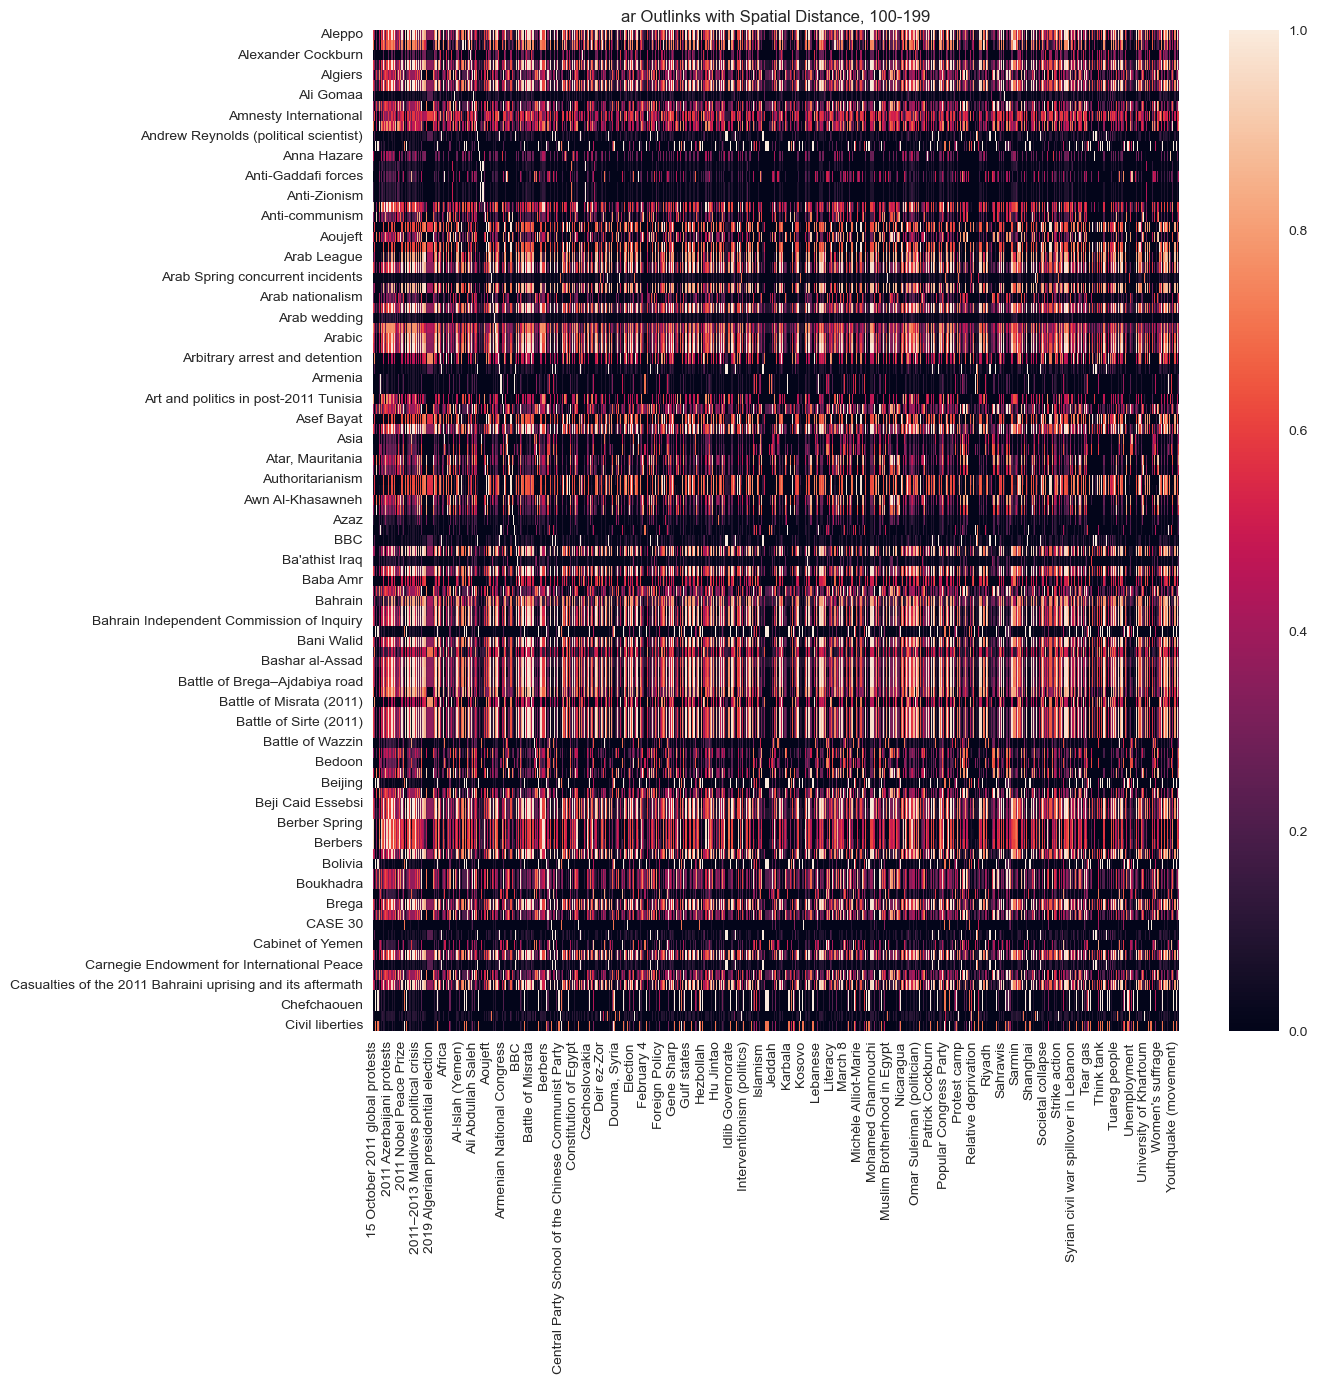

In [49]:
#plot a subsection

plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_ar[100:199])
plt.title('ar Outlinks with Spatial Distance, 100-199')
plt.savefig('02_Visuals/ar_100_199_spatialOutlinkHeatmap.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

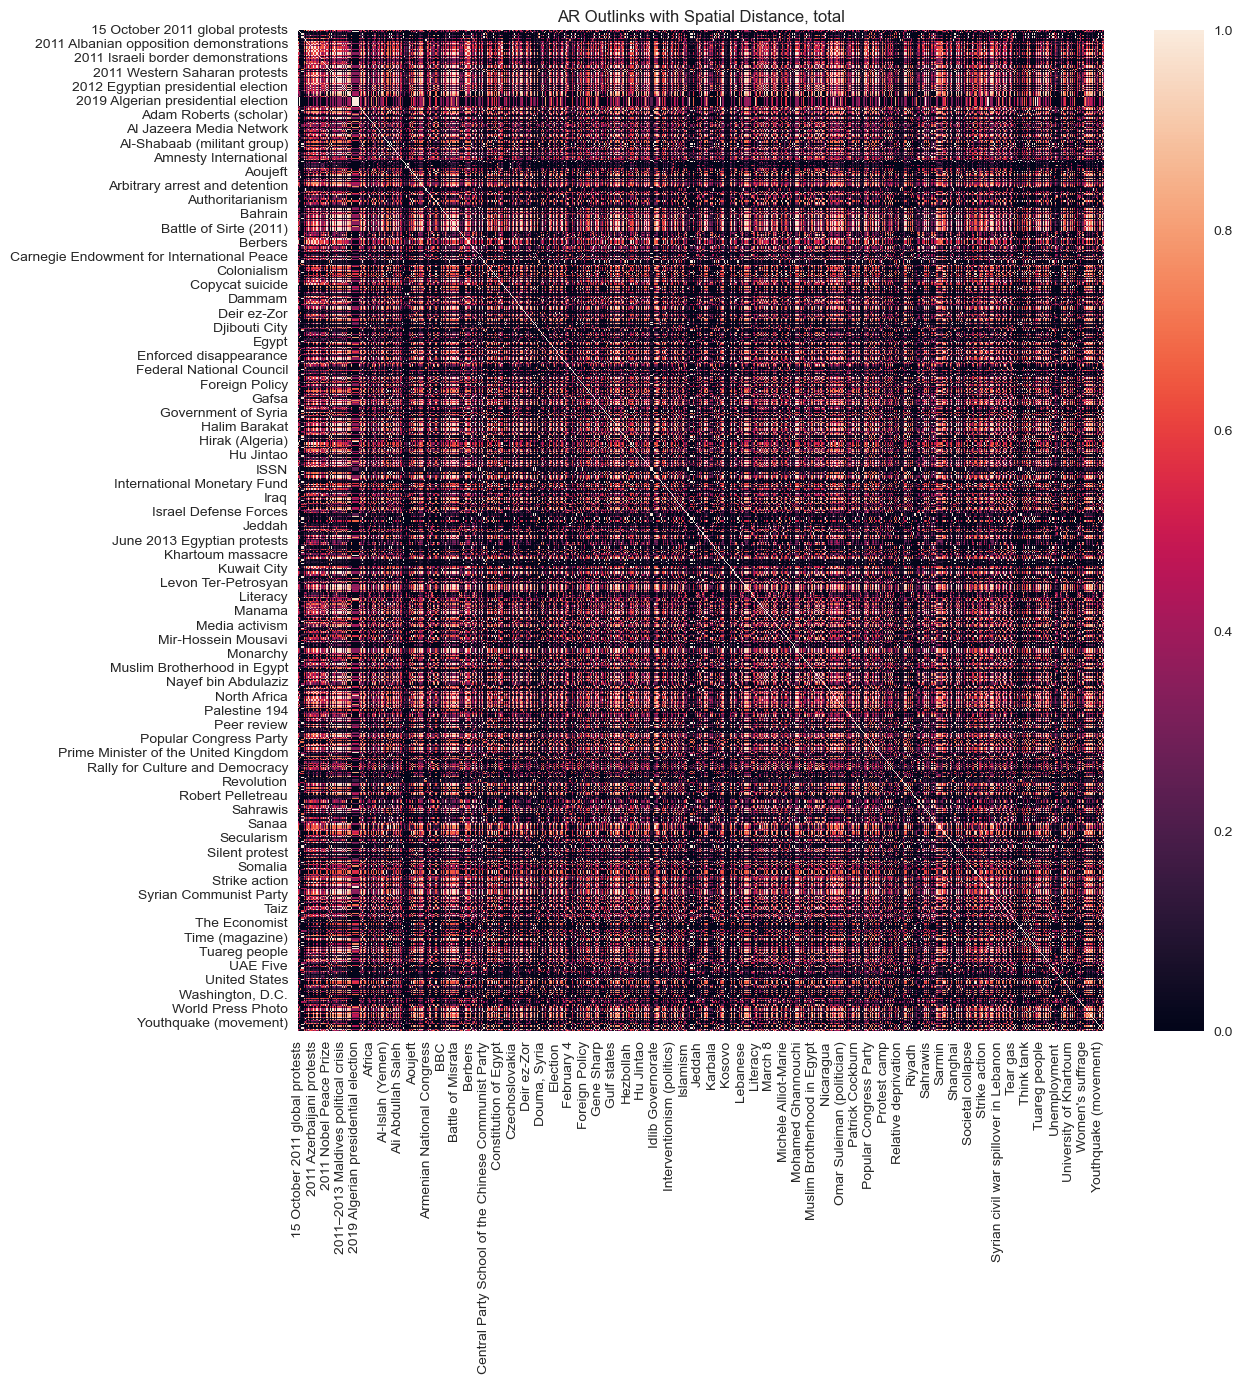

In [50]:
#plot all of the pairwise distances

plt.figure(figsize=(13,13))
heat_map = sns.heatmap(pairDf_ar)
plt.title('AR Outlinks with Spatial Distance, total')
plt.savefig('02_Visuals/ar_tot_spatialOutlinkHeatmap.png')
plt.show

### 2c. Cluster The Outlinks by Pairwise Similarity 

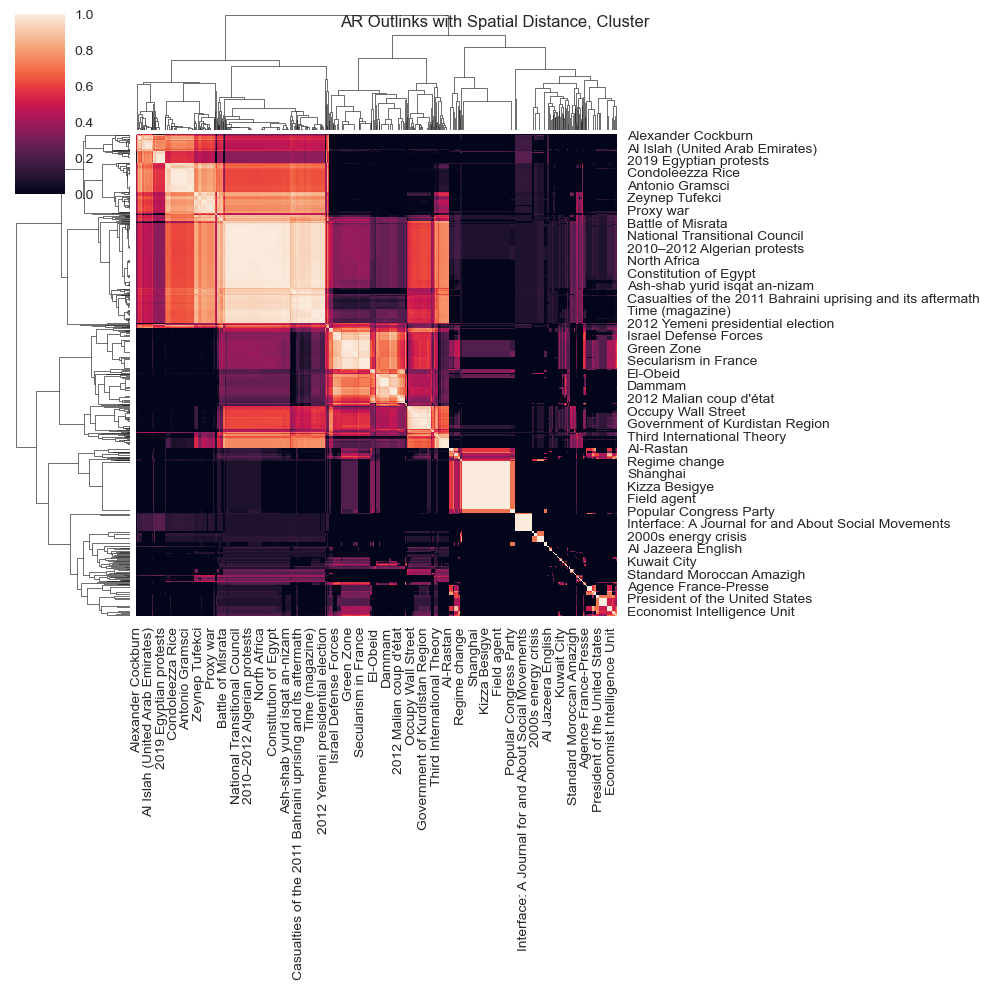

In [51]:
#cluster all of the outlinks by their pairwise similarity

ar_clusterPlt = sns.clustermap(pairDf_ar)
ar_clusterPlt.fig.suptitle("AR Outlinks with Spatial Distance, Cluster")
ar_clusterPlt.savefig('02_Visuals/ar_spatialOutlinkHeatmap_Cluster.png')
ar_clusterPlt
